# VGG 16 MANUAL --

In [68]:
from __future__ import print_function
import numpy as np 
np.random.seed(1337)
import keras
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten ,Dropout,ZeroPadding2D,Dense,Convolution2D,BatchNormalization,Activation
from keras.optimizers import Adam,SGD, Adadelta
from keras.models import Model
from sklearn.model_selection import train_test_split
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

import matplotlib.pyplot as plt
%matplotlib inline
# This Python 3 environment comes with many helpful analytics libraries installed
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ece657a-w20-asg3-part2/testX.csv
/kaggle/input/ece657a-w20-asg3-part2/train.csv


# Loading data--

In [14]:
train_data = pd.read_csv("../input/ece657a-w20-asg3-part2/train.csv")
test_data = pd.read_csv("../input/ece657a-w20-asg3-part2/testX.csv")

x = train_data.iloc[:,2:].values
y = train_data.iloc[:,1].values

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [15]:
x.shape

(60000, 784)

In [16]:
y.shape

(60000,)

# Reshaping the data into 28*28--

In [17]:
x = x.reshape(x.shape[0],28,28,1)

# Splitting the data--

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape

(48000, 28, 28, 1)

In [20]:
x_test.shape

(12000, 28, 28, 1)

In [21]:
y_train.shape

(48000,)

In [22]:
y_test.shape


(12000,)

# Defining sizes--

In [23]:
img_size = 28
input_size = (img_size, img_size,1)
num_classes=5

In [24]:
x_train.shape

(48000, 28, 28, 1)

In [25]:
x_test.shape

(12000, 28, 28, 1)

# Resizing the data to 48*48--

In [26]:
#RESHAPE according to vgg
from keras.preprocessing.image import img_to_array, array_to_img
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
# train_x = preprocess_input(x)
x_train.shape, x_test.shape


((48000, 48, 48, 1), (12000, 48, 48, 1))

# Normalizing the data--

In [27]:
# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (48000, 48, 48, 1)
x_test shape: (12000, 48, 48, 1)
48000 train samples
12000 test samples
y_train shape: (48000,)
y_test shape: (12000,)


# Categorical labels--

In [28]:
#Converting labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [29]:
y_train.shape

(48000, 5)

In [30]:
y_test.shape

(12000, 5)

# Test data preparation--

In [123]:
test_data

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# Reshaping the data into 28*28--

In [124]:
# for test data

#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)


In [125]:
df_x_test.shape

(10000, 28, 28, 1)

# Resizing the real test data into 48*48--

In [126]:
df_x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in df_x_test])

In [127]:
df_x_test.shape

(10000, 48, 48, 1)

# Normalizing the real test data--

In [128]:
df_x_test=df_x_test.astype('float32')
#rescaling it between 0 to 1
df_x_test /=255

# MODEL 1--SGD() | BS: 64 | EPOCH: 50 -------------------------------------

In [129]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [130]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_146 (ZeroPadd (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
zero_padding2d_147 (ZeroPadd (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_251 (Conv2D)          (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
zero_padding2d_148 (ZeroPadd (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_252 (Conv2D)          (None, 24, 24, 128)     

In [131]:
from keras.optimizers import Adam
from keras import optimizers
opt = Adam()
sgd = SGD()

model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [132]:
import timeit 
start=timeit.default_timer()
a=model.fit(x_train,y_train,batch_size=64,epochs = 50,verbose=1,validation_data=(x_test,y_test),shuffle=False)
stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 36s 748us/step - loss: 1.6056 - accuracy: 0.2845 - val_loss: 1.5932 - val_accuracy: 0.3942
Epoch 2/50
48000/48000 [==============================] - 35s 732us/step - loss: 1.4532 - accuracy: 0.3925 - val_loss: 1.2145 - val_accuracy: 0.4593
Epoch 3/50
48000/48000 [==============================] - 35s 735us/step - loss: 1.0026 - accuracy: 0.5522 - val_loss: 0.7866 - val_accuracy: 0.6543
Epoch 4/50
48000/48000 [==============================] - 35s 737us/step - loss: 0.7980 - accuracy: 0.6572 - val_loss: 0.7082 - val_accuracy: 0.7070
Epoch 5/50
48000/48000 [==============================] - 35s 731us/step - loss: 0.7134 - accuracy: 0.7001 - val_loss: 0.6207 - val_accuracy: 0.7481
Epoch 6/50
48000/48000 [==============================] - 35s 734us/step - loss: 0.6492 - accuracy: 0.7327 - val_loss: 0.5989 - val_accuracy: 0.7552
Epoch 7/50
48000/48000 [==============================] 

# RESULT: 
## Epoch 50/50 |val_loss: 0.6540 - val_accuracy: 0.8603 | Time taken 1751.951351571999


In [133]:
print('Time taken',stop-start)

Time taken 1751.951351571999


# PLOTS

In [134]:
a.history

{'val_loss': [1.5932012144724528,
  1.2145360317230225,
  0.7866197992960612,
  0.7081687726974487,
  0.6207290867169698,
  0.598940403620402,
  0.5427607693672181,
  0.5022990522384644,
  0.46380286614100136,
  0.5107319736480713,
  0.4389843107064565,
  0.4050836404959361,
  0.3999874866803487,
  0.390388015349706,
  0.38696422974268596,
  0.36933319505055745,
  0.3846961265405019,
  0.3921792981227239,
  0.3874859088261922,
  0.3957994805177053,
  0.44327680333455405,
  0.40442558709780374,
  0.44276675339539845,
  0.43609673603375754,
  0.4481909426450729,
  0.43995150303840636,
  0.5015620513359705,
  0.4620811210076014,
  0.45039517708619436,
  0.49844409883022306,
  0.4831814392407735,
  0.5270913123289744,
  0.5280681810379029,
  0.514625539859136,
  0.5005746223529179,
  0.5359689731597901,
  0.6664837786753972,
  0.5922953032255173,
  0.5703669300079346,
  0.5900914144515991,
  0.6279458131790161,
  0.6823350585301717,
  0.5489739282925924,
  0.6704932882785797,
  0.605718155

In [135]:
print(a.history['accuracy'])
print(a.history['loss'])
print(a.history['val_accuracy'])
print(a.history['val_loss'])

[0.28452083, 0.39254168, 0.55222917, 0.65725, 0.700125, 0.7326667, 0.7527292, 0.76970834, 0.785, 0.798375, 0.81364584, 0.8251875, 0.83739585, 0.848375, 0.85554165, 0.86466664, 0.87289584, 0.8819583, 0.88829166, 0.89547914, 0.8983125, 0.9047083, 0.91033334, 0.9154583, 0.9222917, 0.9235625, 0.92845833, 0.93177086, 0.93575, 0.94060415, 0.9447917, 0.9487917, 0.953375, 0.9529375, 0.9554167, 0.9605625, 0.95975, 0.9652708, 0.9665, 0.967375, 0.96914583, 0.97325, 0.9715833, 0.9776458, 0.97275, 0.978, 0.98125, 0.9822083, 0.983625, 0.9828125]
[1.605609435081482, 1.4531625226338705, 1.0026460366249084, 0.7980231695175171, 0.7134188981056213, 0.6491566752195358, 0.5998813370863597, 0.5597329027255377, 0.5221320823431015, 0.489961182932059, 0.4555184757510821, 0.4286949297388395, 0.40227901047468184, 0.3792532067100207, 0.36004186366001767, 0.3369752258261045, 0.31985698713858923, 0.30047008591890334, 0.2828509961565336, 0.26700769567489624, 0.2566434388657411, 0.24013226217031478, 0.227657735178867

### Making dataframe

In [136]:
train_acc_1=a.history['accuracy']
train_loss_1=a.history['loss']
val_acc_1=a.history['val_accuracy']
val_loss_1=a.history['val_loss']

num=len(a.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [137]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [138]:
history_df1=pd.DataFrame(eplist,columns = ['Epoch'])
history_df1['train_acc']=pd.DataFrame(train_acc_1)

In [139]:
history_df1['train_loss']=pd.DataFrame(train_loss_1)
history_df1['val_acc']=pd.DataFrame(val_acc_1)
history_df1['val_loss']=pd.DataFrame(val_loss_1)

In [140]:
history_df1

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.284521,1.605609,0.394167,1.593201
1,2,0.392542,1.453163,0.459250,1.214536
2,3,0.552229,1.002646,0.654250,0.786620
3,4,0.657250,0.798023,0.707000,0.708169
4,5,0.700125,0.713419,0.748083,0.620729
5,6,0.732667,0.649157,0.755250,0.598940
6,7,0.752729,0.599881,0.782667,0.542761
7,8,0.769708,0.559733,0.792250,0.502299
8,9,0.785000,0.522132,0.812083,0.463803
9,10,0.798375,0.489961,0.788750,0.510732


### Epoch vs Train loss

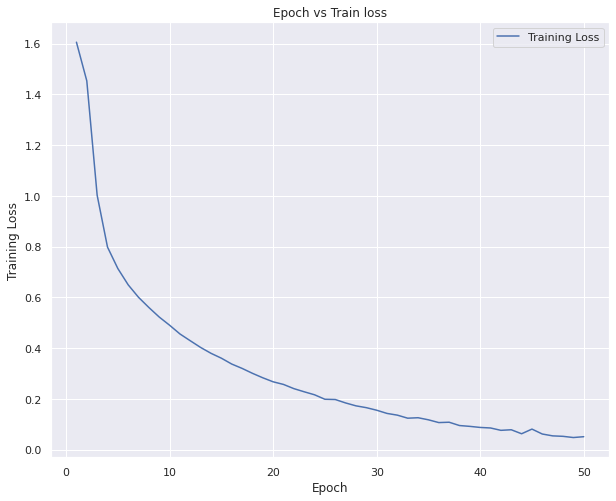

In [141]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df1)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

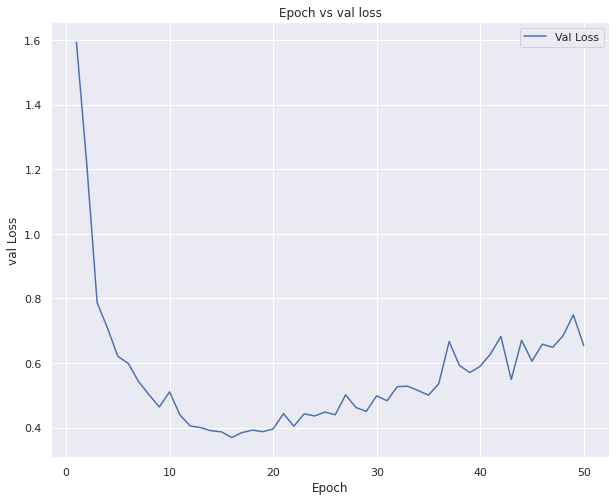

In [142]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df1)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

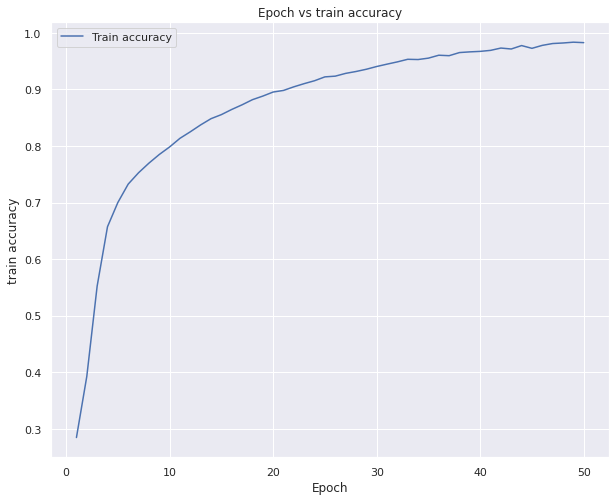

In [143]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df1)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

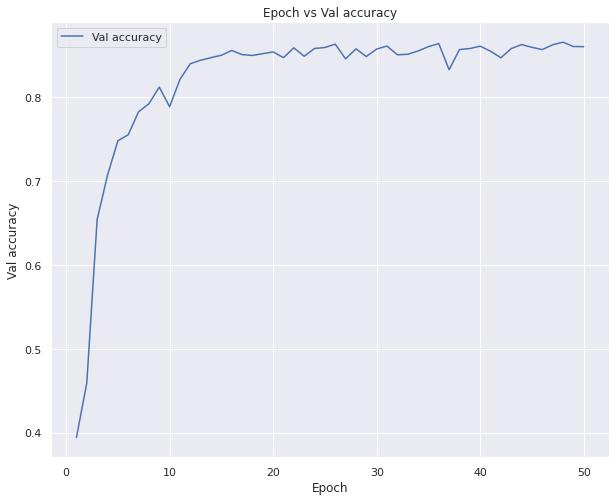

In [144]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df1)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

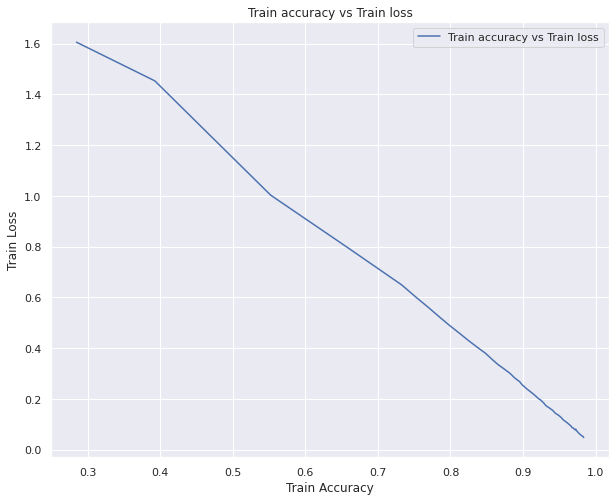

In [145]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df1)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

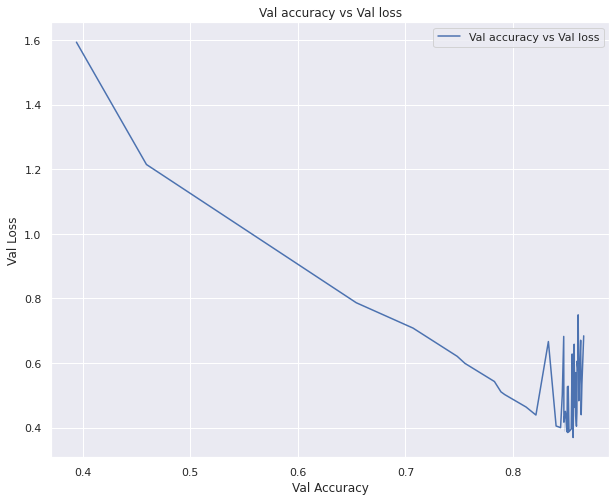

In [146]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df1)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled data---

In [147]:
target_classes = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 3s 297us/step


In [148]:
target_classes

array([[8.1643563e-09, 1.2250723e-07, 5.5914329e-06, 1.5239158e-02,
        9.8475510e-01],
       [2.3816021e-18, 8.6763173e-18, 1.5205071e-16, 1.2990295e-08,
        1.0000000e+00],
       [7.8328401e-02, 9.2160255e-01, 6.3211977e-05, 2.6305295e-07,
        5.5170831e-06],
       ...,
       [1.7802352e-06, 1.6379022e-04, 1.7295919e-02, 5.1754373e-01,
        4.6499470e-01],
       [1.4587052e-07, 1.3828733e-05, 9.9998546e-01, 5.6975261e-07,
        7.7862694e-10],
       [4.4784338e-07, 3.1179006e-06, 9.9986446e-01, 1.3071792e-04,
        1.2108319e-06]], dtype=float32)

In [149]:
target_classes=np.argmax(target_classes,axis=1)

In [150]:
target_classes

array([4, 4, 1, ..., 3, 2, 2])

In [151]:
target_classes=pd.DataFrame(target_classes)

In [152]:
target_classes

,0
0,4
1,4
2,1
3,1
4,3
...,...
9995,1
9996,1
9997,3
9998,2


In [153]:
target_classes=pd.DataFrame.reset_index(target_classes)
target_classes.columns=['Id','Label']

In [154]:
target_classes

,Id,Label
0,0,4
1,1,4
2,2,1
3,3,1
4,4,3
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2


In [155]:
filename = 'submission_vgg.csv'
target_classes.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_vgg.csv


# MODEL 2--SGD(momentum=0.9, nesterov=True) | BS: 64 | EPOCH: 10 -------------------------------------
# *****SAME ACCURACY ON EPOCH=50*****

In [180]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [181]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_237 (ZeroPadd (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_341 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
zero_padding2d_238 (ZeroPadd (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_342 (Conv2D)          (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 24, 24, 64)        0         
_________________________________________________________________
zero_padding2d_239 (ZeroPadd (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_343 (Conv2D)          (None, 24, 24, 128)     

In [183]:
from keras.optimizers import Adam
from keras import optimizers
opt = Adam()
sgd = SGD(momentum=0.9, nesterov=True) 
# , nesterov=True
model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [184]:
import timeit 
start=timeit.default_timer()
b=model.fit(x_train,y_train,batch_size=64,epochs = 10,verbose=1,validation_data=(x_test,y_test),shuffle=False)
stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 37s 778us/step - loss: 1.6048 - accuracy: 0.2127 - val_loss: 1.6097 - val_accuracy: 0.1982
Epoch 2/10
48000/48000 [==============================] - 37s 764us/step - loss: 1.6067 - accuracy: 0.2043 - val_loss: 1.6099 - val_accuracy: 0.1982
Epoch 3/10
48000/48000 [==============================] - 37s 764us/step - loss: 1.6104 - accuracy: 0.1995 - val_loss: 1.6099 - val_accuracy: 0.1982
Epoch 4/10
48000/48000 [==============================] - 37s 764us/step - loss: 1.6103 - accuracy: 0.1985 - val_loss: 1.6099 - val_accuracy: 0.1982
Epoch 5/10
48000/48000 [==============================] - 36s 760us/step - loss: 1.6102 - accuracy: 0.2000 - val_loss: 1.6098 - val_accuracy: 0.1982
Epoch 6/10
48000/48000 [==============================] - 37s 764us/step - loss: 1.6102 - accuracy: 0.1994 - val_loss: 1.6098 - val_accuracy: 0.1982
Epoch 7/10
48000/48000 [==============================] 

# RESULT: 
## Epoch 50/50 |val_loss: 1.6097 - val_accuracy: 0.1982 Time taken 368.21423150300143

In [185]:
print('Time taken',stop-start)

Time taken 368.21423150300143


# PLOTS

In [186]:
b.history

{'val_loss': [1.6097215023040772,
  1.6099089148839314,
  1.609892827987671,
  1.609851863861084,
  1.609844212214152,
  1.6098059088389078,
  1.6097976169586181,
  1.6098048458099365,
  1.6097816254297892,
  1.6097491823832193],
 'val_accuracy': [0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558,
  0.19824999570846558],
 'loss': [1.604796781539917,
  1.6066950656572978,
  1.6103557488123577,
  1.6103226563135782,
  1.6102150630950929,
  1.6102485585212707,
  1.6102538123130798,
  1.6101945013999939,
  1.6101454312006633,
  1.6102503832181294],
 'accuracy': [0.21272917,
  0.20427084,
  0.1995,
  0.19845833,
  0.20004167,
  0.199375,
  0.19797917,
  0.19808333,
  0.20125,
  0.1956875]}

In [187]:
print(b.history['accuracy'])
print(b.history['loss'])
print(b.history['val_accuracy'])
print(b.history['val_loss'])

[0.21272917, 0.20427084, 0.1995, 0.19845833, 0.20004167, 0.199375, 0.19797917, 0.19808333, 0.20125, 0.1956875]
[1.604796781539917, 1.6066950656572978, 1.6103557488123577, 1.6103226563135782, 1.6102150630950929, 1.6102485585212707, 1.6102538123130798, 1.6101945013999939, 1.6101454312006633, 1.6102503832181294]
[0.19824999570846558, 0.19824999570846558, 0.19824999570846558, 0.19824999570846558, 0.19824999570846558, 0.19824999570846558, 0.19824999570846558, 0.19824999570846558, 0.19824999570846558, 0.19824999570846558]
[1.6097215023040772, 1.6099089148839314, 1.609892827987671, 1.609851863861084, 1.609844212214152, 1.6098059088389078, 1.6097976169586181, 1.6098048458099365, 1.6097816254297892, 1.6097491823832193]


### Making dataframe

In [188]:
train_acc_1=b.history['accuracy']
train_loss_1=b.history['loss']
val_acc_1=b.history['val_accuracy']
val_loss_1=b.history['val_loss']

num=len(b.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [189]:
eplist

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [190]:
history_df2=pd.DataFrame(eplist,columns = ['Epoch'])
history_df2['train_acc']=pd.DataFrame(train_acc_1)

In [191]:
history_df2['train_loss']=pd.DataFrame(train_loss_1)
history_df2['val_acc']=pd.DataFrame(val_acc_1)
history_df2['val_loss']=pd.DataFrame(val_loss_1)

In [192]:
history_df2

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.212729,1.604797,0.19825,1.609722
1,2,0.204271,1.606695,0.19825,1.609909
2,3,0.199500,1.610356,0.19825,1.609893
3,4,0.198458,1.610323,0.19825,1.609852
4,5,0.200042,1.610215,0.19825,1.609844
5,6,0.199375,1.610249,0.19825,1.609806
6,7,0.197979,1.610254,0.19825,1.609798
7,8,0.198083,1.610195,0.19825,1.609805
8,9,0.201250,1.610145,0.19825,1.609782
9,10,0.195688,1.610250,0.19825,1.609749


### Epoch vs Train loss

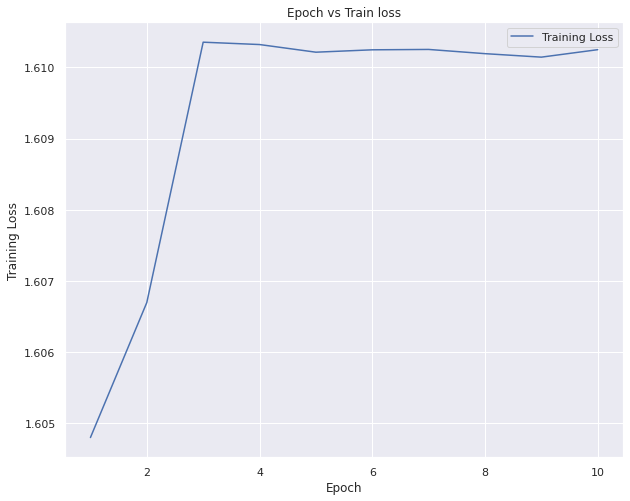

In [193]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df2)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

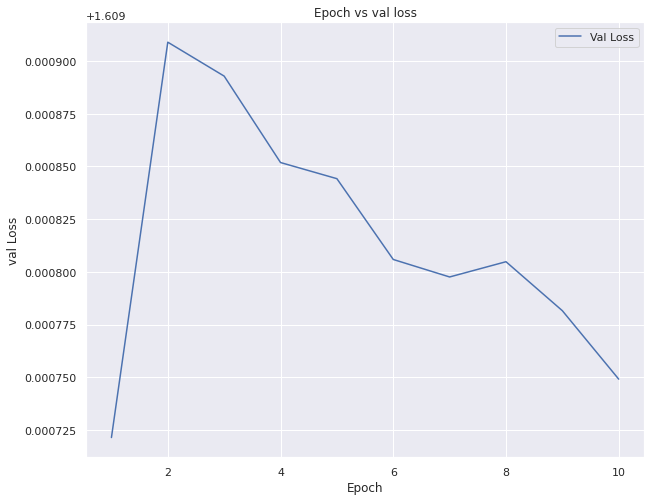

In [194]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df2)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

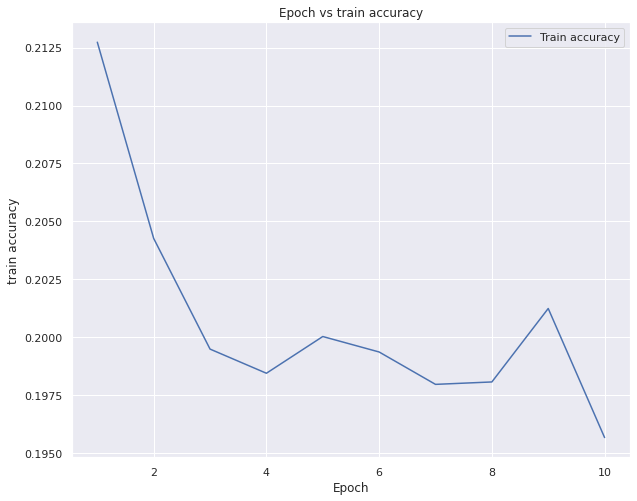

In [195]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df2)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

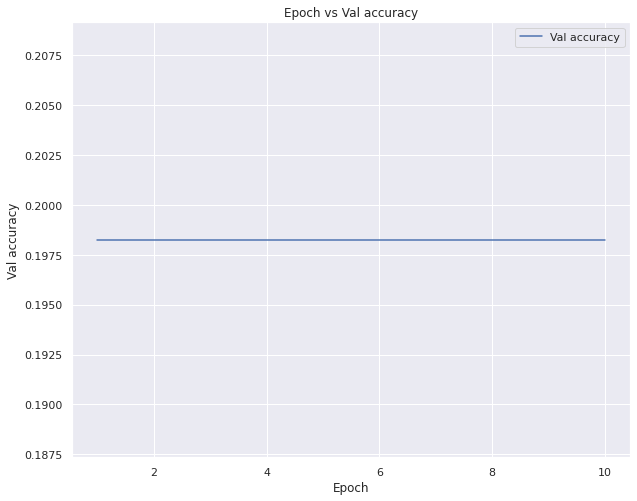

In [196]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df2)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

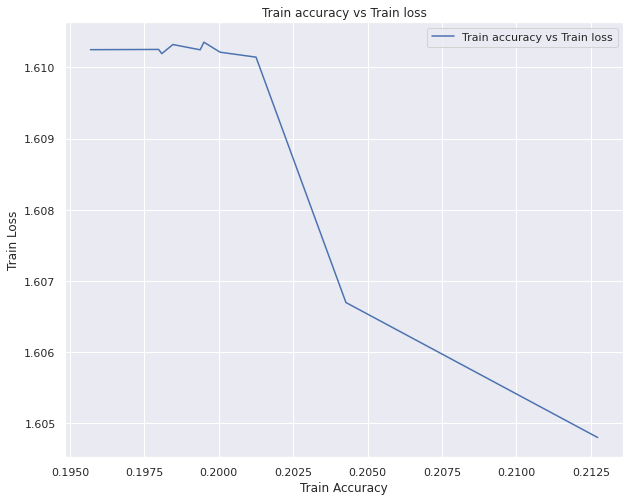

In [197]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df2)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

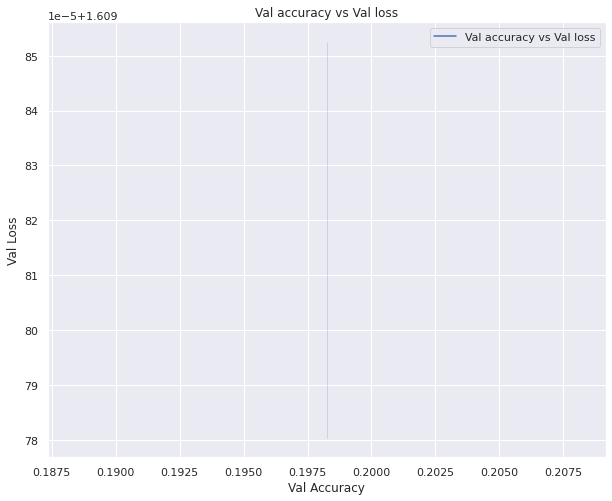

In [198]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df2)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled data---

In [199]:
target_classes1 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 3s 296us/step


In [200]:
target_classes1

array([[0.20529081, 0.20120858, 0.20322707, 0.19345133, 0.1968222 ],
       [0.20529069, 0.20120852, 0.20322707, 0.19345146, 0.19682229],
       [0.20529087, 0.20120874, 0.20322707, 0.19345121, 0.1968221 ],
       ...,
       [0.20529075, 0.20120853, 0.20322706, 0.19345139, 0.19682223],
       [0.20529084, 0.20120867, 0.20322709, 0.19345124, 0.19682217],
       [0.20529068, 0.20120862, 0.20322707, 0.19345143, 0.19682221]],
      dtype=float32)

In [201]:
target_classes1=np.argmax(target_classes1,axis=1)

In [202]:
target_classes1

array([0, 0, 0, ..., 0, 0, 0])

In [203]:
target_classes1=pd.DataFrame(target_classes1)

In [204]:
target_classes1

,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [205]:
target_classes1=pd.DataFrame.reset_index(target_classes1)
target_classes1.columns=['Id','Label']

In [206]:
target_classes1

,Id,Label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9995,9995,0
9996,9996,0
9997,9997,0
9998,9998,0


In [207]:
filename = 'submission_vgg1.csv'
target_classes1.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_vgg1.csv


# MODEL 3--Adam() | BS: 64 | EPOCH: 30 ------------------------------------

In [216]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [217]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_276 (ZeroPadd (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_380 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
zero_padding2d_277 (ZeroPadd (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_381 (Conv2D)          (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 24, 24, 64)        0         
_________________________________________________________________
zero_padding2d_278 (ZeroPadd (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_382 (Conv2D)          (None, 24, 24, 128)     

In [218]:
from keras.optimizers import Adam
from keras import optimizers
# adam = Adam()
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

## Adam() Fails due to the large number of parameters in the VGG network. use sgd.

In [219]:
import timeit 
start=timeit.default_timer()
c=model.fit(x_train,y_train,batch_size=64,epochs = 30,verbose=1,validation_data=(x_test,y_test),shuffle=False)
stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 42s 884us/step - loss: 1.6104 - accuracy: 0.1992 - val_loss: 1.6097 - val_accuracy: 0.1970
Epoch 2/30
48000/48000 [==============================] - 41s 862us/step - loss: 1.6097 - accuracy: 0.1970 - val_loss: 1.6097 - val_accuracy: 0.1970
Epoch 3/30
48000/48000 [==============================] - 41s 864us/step - loss: 1.6096 - accuracy: 0.1975 - val_loss: 1.6096 - val_accuracy: 0.1970
Epoch 4/30
48000/48000 [==============================] - 41s 864us/step - loss: 1.6096 - accuracy: 0.1989 - val_loss: 1.6096 - val_accuracy: 0.1970
Epoch 5/30
48000/48000 [==============================] - 41s 863us/step - loss: 1.6096 - accuracy: 0.1968 - val_loss: 1.6096 - val_accuracy: 0.1970
Epoch 6/30
48000/48000 [==============================] - 41s 857us/step - loss: 1.6096 - accuracy: 0.1964 - val_loss: 1.6096 - val_accuracy: 0.1970
Epoch 7/30
48000/48000 [==============================] 

# RESULT: 
## Epoch 50/50 |val_loss: 1.6096 - val_accuracy: 0.1970 | Time taken 1238.6372289899991

In [221]:
print('Time taken',stop-start)

Time taken 1238.6372289899991


# PLOTS

In [222]:
c.history

{'val_loss': [1.6096699612935383,
  1.6096665328343709,
  1.6096222483317058,
  1.6095934759775798,
  1.6095833304723104,
  1.6095997826258341,
  1.6095820407867432,
  1.6095956083933511,
  1.6095824629465738,
  1.6095839672088623,
  1.6095840263366699,
  1.6095839659372966,
  1.609584010442098,
  1.6095840396881103,
  1.6095840396881103,
  1.6095840717951457,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623,
  1.6095839672088623],
 'val_accuracy': [0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.19699999690055847,
  0.196999996

In [223]:
print(c.history['accuracy'])
print(c.history['loss'])
print(c.history['val_accuracy'])
print(c.history['val_loss'])

[0.19920833, 0.19695833, 0.19745833, 0.1989375, 0.19677083, 0.196375, 0.19772917, 0.19758333, 0.1966875, 0.1961875, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333, 0.19633333]
[1.610422047138214, 1.6097120118141175, 1.6096156393686931, 1.6095738511085511, 1.6095945819218953, 1.6095525830586752, 1.609553654352824, 1.6095417513847352, 1.6095458861986796, 1.6095413812001547, 1.6095415156682333, 1.6095415239334105, 1.6095415225028993, 1.6095415269533793, 1.6095415285428365, 1.609541525363922, 1.6095415244102478, 1.6095415245691935, 1.609541523774465, 1.6095415228207905, 1.609541522026062, 1.6095415225028993, 1.6095415229797363, 1.609541522026062, 1.609541521390279, 1.6095415217081706, 1.6095415218671163, 1.6095415225028993, 1.6095415215492248, 1.6095415228207905]
[0.19699999690055847, 0.19699999690055847, 0.19699

### Making dataframe

In [224]:
train_acc_1=c.history['accuracy']
train_loss_1=c.history['loss']
val_acc_1=c.history['val_accuracy']
val_loss_1=c.history['val_loss']

num=len(c.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [225]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [226]:
history_df3=pd.DataFrame(eplist,columns = ['Epoch'])
history_df3['train_acc']=pd.DataFrame(train_acc_1)

In [227]:
history_df3['train_loss']=pd.DataFrame(train_loss_1)
history_df3['val_acc']=pd.DataFrame(val_acc_1)
history_df3['val_loss']=pd.DataFrame(val_loss_1)

In [228]:
history_df3

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.199208,1.610422,0.197,1.609670
1,2,0.196958,1.609712,0.197,1.609667
2,3,0.197458,1.609616,0.197,1.609622
3,4,0.198938,1.609574,0.197,1.609593
4,5,0.196771,1.609595,0.197,1.609583
5,6,0.196375,1.609553,0.197,1.609600
6,7,0.197729,1.609554,0.197,1.609582
7,8,0.197583,1.609542,0.197,1.609596
8,9,0.196688,1.609546,0.197,1.609582
9,10,0.196187,1.609541,0.197,1.609584


### Epoch vs Train loss

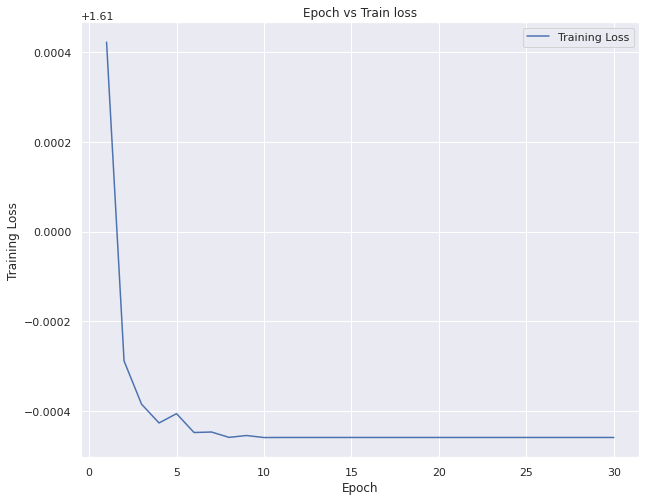

In [229]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df3)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

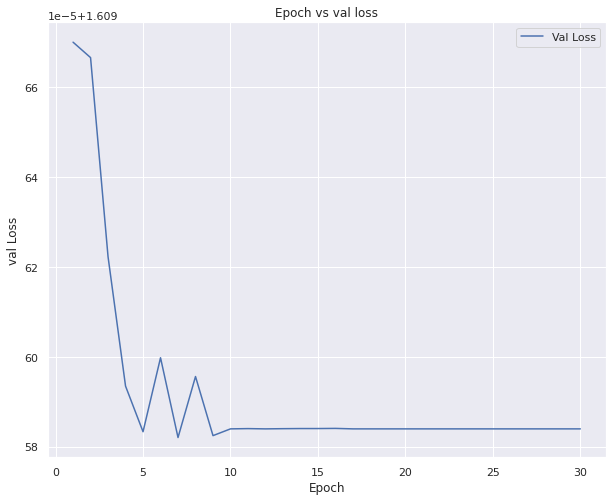

In [232]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df3)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()



### Epoch vs Train accuracy 

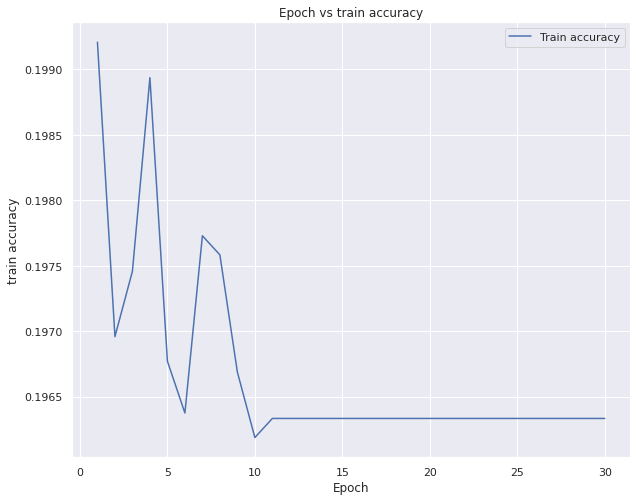

In [231]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df3)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

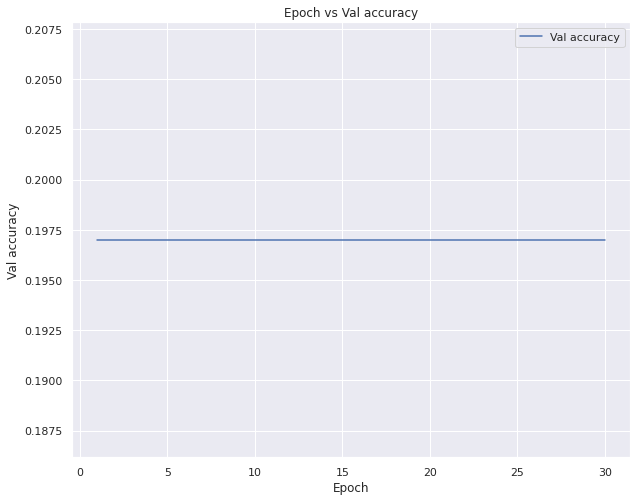

In [233]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df3)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

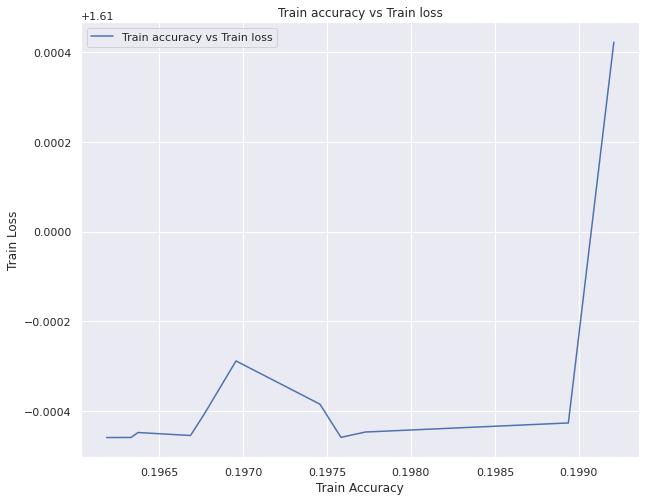

In [234]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df3)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

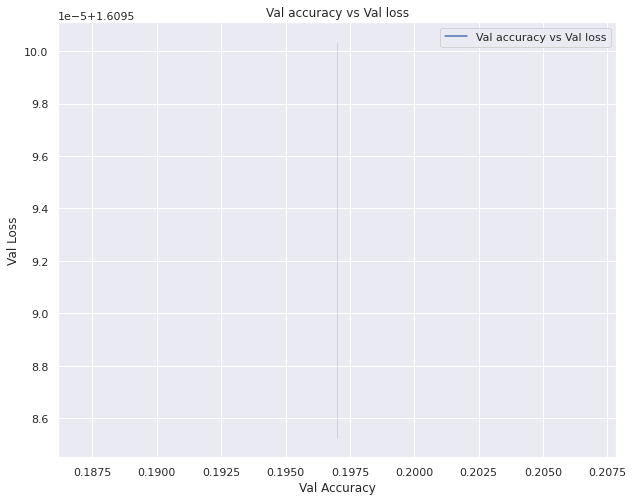

In [235]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df3)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Predicting unlabelled data---

In [241]:
target_classes2 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 3s 294us/step


In [242]:
target_classes2

array([[0.20036268, 0.19955225, 0.20234214, 0.20025498, 0.19748797],
       [0.20036268, 0.19955225, 0.20234214, 0.20025498, 0.19748797],
       [0.20036268, 0.19955225, 0.20234214, 0.20025498, 0.19748797],
       ...,
       [0.20036268, 0.19955225, 0.20234214, 0.20025498, 0.19748797],
       [0.20036268, 0.19955225, 0.20234214, 0.20025498, 0.19748797],
       [0.20036268, 0.19955225, 0.20234214, 0.20025498, 0.19748797]],
      dtype=float32)

In [243]:
target_classes2=np.argmax(target_classes2,axis=1)

In [244]:
target_classes2

array([2, 2, 2, ..., 2, 2, 2])

In [245]:
target_classes2=pd.DataFrame(target_classes2)

In [246]:
target_classes2

,0
0,2
1,2
2,2
3,2
4,2
...,...
9995,2
9996,2
9997,2
9998,2


In [247]:
target_classes2=pd.DataFrame.reset_index(target_classes2)
target_classes2.columns=['Id','Label']

In [248]:
target_classes2

,Id,Label
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
9995,9995,2
9996,9996,2
9997,9997,2
9998,9998,2


In [249]:
filename = 'submission_vgg2.csv'
target_classes2.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_vgg2.csv
